In [22]:
import pandas as pd
import hvplot.pandas
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
# Read in the csv file
file = "../Data/us_videos_cleaned.csv"
us_videos_df = pd.read_csv(file)
us_videos_df.head()

video_id publish_date publish_time trending_date  diff_days  \
0  2kyS6SvSYSE   2017-11-13     17:13:01    2017-11-14          1   
1  1ZAPwfrtAFY   2017-11-13     07:30:00    2017-11-14          1   
2  5qpjK5DgCt4   2017-11-12     19:05:24    2017-11-14          2   
3  puqaWrEC7tY   2017-11-13     11:00:04    2017-11-14          1   
4  d380meD0W0M   2017-11-12     18:01:41    2017-11-14          2   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id   category_type  \
0           22  People & Blogs   
1           24   Entertainment   
2           23          Comedy   
3           24   Entertainment   
4           24   Entertainment   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   
2      5339           8181              False             False   
3       666           2146              False             False   
4      1989          17518              False             False   

   video_error_or_removed  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

In [3]:
us_videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   publish_date            40949 non-null  object
 2   publish_time            40949 non-null  object
 3   trending_date           40949 non-null  object
 4   diff_days               40949 non-null  int64 
 5   title                   40949 non-null  object
 6   channel_title           40949 non-null  object
 7   category_id             40949 non-null  int64 
 8   category_type           40949 non-null  object
 9   tags                    40949 non-null  object
 10  views                   40949 non-null  int64 
 11  likes                   40949 non-null  int64 
 12  dislikes                40949 non-null  int64 
 13  comment_count           40949 non-null  int64 
 14  comments_disabled       40949 non-null  bool  
 15  ra

In [4]:
# Set the video_id column as the index for the dataframe
us_videos_df.set_index("video_id", inplace=True)
us_videos_df.index.name = None
us_videos_df.head()

publish_date publish_time trending_date  diff_days  \
2kyS6SvSYSE   2017-11-13     17:13:01    2017-11-14          1   
1ZAPwfrtAFY   2017-11-13     07:30:00    2017-11-14          1   
5qpjK5DgCt4   2017-11-12     19:05:24    2017-11-14          2   
puqaWrEC7tY   2017-11-13     11:00:04    2017-11-14          1   
d380meD0W0M   2017-11-12     18:01:41    2017-11-14          2   

                                                         title  \
2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
d380meD0W0M                           I Dare You: GOING BALD!?   

                     channel_title  category_id   category_type  \
2kyS6SvSYSE           CaseyNeistat           22  People & Blogs   
1ZAPwfrtAFY        LastWeekTonight           24   Entertainment   
5qpjK5DgCt4           Rudy Mancuso           23          Comedy   
puqaWrEC7tY  Good Mythical Morning           24   Entertainment   
d380meD0W0M               nigahiga           24   Entertainment   

                                                          tags    views  \
2kyS6SvSYSE                                    SHANtell martin   748374   
1ZAPwfrtAFY  last week tonight trump presidency|"last week ...  2418783   
5qpjK5DgCt4  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434   
puqaWrEC7tY  rhett and link|"gmm"|"good mythical morning"|"...   343168   
d380meD0W0M  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731   

              likes  dislikes  comment_count  comments_disabled  \
2kyS6SvSYSE   57527      2966          15954              False   
1ZAPwfrtAFY   97185      6146          12703              False   
5qpjK5DgCt4  146033      5339           8181              False   
puqaWrEC7tY   10172       666           2146              False   
d380meD0W0M  132235      1989          17518              False   

             ratings_disabled  video_error_or_removed  
2kyS6SvSYSE             False                   False  
1ZAPwfrtAFY             False                   False  
5qpjK5DgCt4             False                   False  
puqaWrEC7tY             False                   False  
d380meD0W0M             False                   False

Try to use unsupervised machine learning to find pattern using "category_id", "views", "likes", "dislikes", "comment_count", "comments_disabled", "ratings_disabled", "video_error_or_removed" columns

In [5]:
unsupervised_df = us_videos_df.drop(columns=["publish_date",
                                             "publish_time",
                                             "trending_date",
                                             "diff_days",
                                             "title", 
                                             "channel_title",
                                             "category_type",
                                             "tags"])
unsupervised_df.head()

category_id    views   likes  dislikes  comment_count  \
2kyS6SvSYSE           22   748374   57527      2966          15954   
1ZAPwfrtAFY           24  2418783   97185      6146          12703   
5qpjK5DgCt4           23  3191434  146033      5339           8181   
puqaWrEC7tY           24   343168   10172       666           2146   
d380meD0W0M           24  2095731  132235      1989          17518   

             comments_disabled  ratings_disabled  video_error_or_removed  
2kyS6SvSYSE              False             False                   False  
1ZAPwfrtAFY              False             False                   False  
5qpjK5DgCt4              False             False                   False  
puqaWrEC7tY              False             False                   False  
d380meD0W0M              False             False                   False

In [6]:
unsupervised_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   category_id             40949 non-null  int64
 1   views                   40949 non-null  int64
 2   likes                   40949 non-null  int64
 3   dislikes                40949 non-null  int64
 4   comment_count           40949 non-null  int64
 5   comments_disabled       40949 non-null  bool 
 6   ratings_disabled        40949 non-null  bool 
 7   video_error_or_removed  40949 non-null  bool 
dtypes: bool(3), int64(5)
memory usage: 2.0+ MB


In [7]:
# Create a function for transforming the boolean value columns
def change_bool(column):
    if column == True:
        return 1
    else:
        return 0

In [8]:
# Apply the function to the boolean value columns
unsupervised_df['comments_disabled'] = unsupervised_df['comments_disabled'].apply(change_bool)
unsupervised_df['ratings_disabled'] = unsupervised_df['ratings_disabled'].apply(change_bool)
unsupervised_df['video_error_or_removed'] = unsupervised_df['video_error_or_removed'].apply(change_bool)
unsupervised_df.head()

category_id    views   likes  dislikes  comment_count  \
2kyS6SvSYSE           22   748374   57527      2966          15954   
1ZAPwfrtAFY           24  2418783   97185      6146          12703   
5qpjK5DgCt4           23  3191434  146033      5339           8181   
puqaWrEC7tY           24   343168   10172       666           2146   
d380meD0W0M           24  2095731  132235      1989          17518   

             comments_disabled  ratings_disabled  video_error_or_removed  
2kyS6SvSYSE                  0                 0                       0  
1ZAPwfrtAFY                  0                 0                       0  
5qpjK5DgCt4                  0                 0                       0  
puqaWrEC7tY                  0                 0                       0  
d380meD0W0M                  0                 0                       0

In [9]:
unsupervised_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   category_id             40949 non-null  int64
 1   views                   40949 non-null  int64
 2   likes                   40949 non-null  int64
 3   dislikes                40949 non-null  int64
 4   comment_count           40949 non-null  int64
 5   comments_disabled       40949 non-null  int64
 6   ratings_disabled        40949 non-null  int64
 7   video_error_or_removed  40949 non-null  int64
dtypes: int64(8)
memory usage: 2.8+ MB


In [10]:
# store the values of k to plot
inertia = []
k = list(range(1, 11))

In [12]:
# looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(unsupervised_df)
    inertia.append(km.inertia_)

In [13]:
# # Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [14]:
# Create a function for getting cluster number
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [17]:
# Trying 4 cluster for the dataset
four_cluster = get_clusters(4, unsupervised_df)
four_cluster.head()

category_id    views   likes  dislikes  comment_count  \
2kyS6SvSYSE           22   748374   57527      2966          15954   
1ZAPwfrtAFY           24  2418783   97185      6146          12703   
5qpjK5DgCt4           23  3191434  146033      5339           8181   
puqaWrEC7tY           24   343168   10172       666           2146   
d380meD0W0M           24  2095731  132235      1989          17518   

             comments_disabled  ratings_disabled  video_error_or_removed  \
2kyS6SvSYSE                  0                 0                       0   
1ZAPwfrtAFY                  0                 0                       0   
5qpjK5DgCt4                  0                 0                       0   
puqaWrEC7tY                  0                 0                       0   
d380meD0W0M                  0                 0                       0   

             class  
2kyS6SvSYSE      0  
1ZAPwfrtAFY      0  
5qpjK5DgCt4      0  
puqaWrEC7tY      0  
d380meD0W0M      0

In [19]:
# 5 clusters for the dataset
five_cluster = get_clusters(5, unsupervised_df)
five_cluster.head()

category_id    views   likes  dislikes  comment_count  \
2kyS6SvSYSE           22   748374   57527      2966          15954   
1ZAPwfrtAFY           24  2418783   97185      6146          12703   
5qpjK5DgCt4           23  3191434  146033      5339           8181   
puqaWrEC7tY           24   343168   10172       666           2146   
d380meD0W0M           24  2095731  132235      1989          17518   

             comments_disabled  ratings_disabled  video_error_or_removed  \
2kyS6SvSYSE                  0                 0                       0   
1ZAPwfrtAFY                  0                 0                       0   
5qpjK5DgCt4                  0                 0                       0   
puqaWrEC7tY                  0                 0                       0   
d380meD0W0M                  0                 0                       0   

             class  
2kyS6SvSYSE      0  
1ZAPwfrtAFY      0  
5qpjK5DgCt4      0  
puqaWrEC7tY      0  
d380meD0W0M      0

In [20]:
# Create the 2D plot for k=4
four_cluster.hvplot.scatter(x="likes", y="views", by='class')

:NdOverlay   [class]
   :Scatter   [likes]   (views)

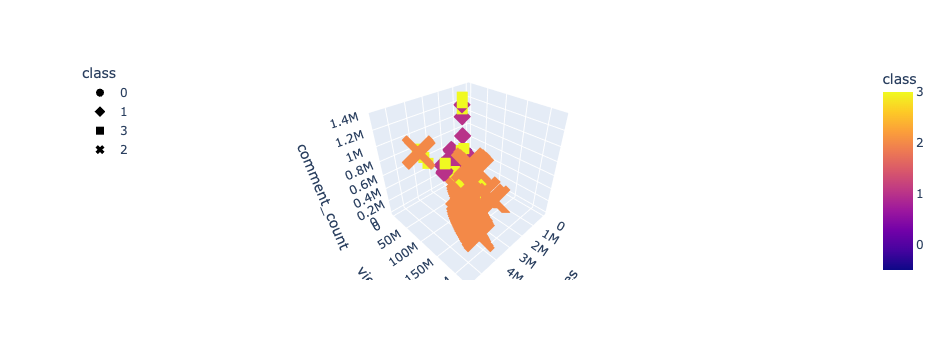

In [24]:
# Create 3D plot for K=4
fig = px.scatter_3d(four_cluster, 
                    x="likes",
                    y="views",
                    z="comment_count",
                    color="class",
                    symbol="class",
                    width=800)

fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [25]:
# Create the 2D plot for k=5
five_cluster.hvplot.scatter(x="likes", y="views", by='class')

:NdOverlay   [class]
   :Scatter   [likes]   (views)

In [26]:
# Create 3D plot for K=5
fig = px.scatter_3d(five_cluster, 
                    x="likes",
                    y="views",
                    z="comment_count",
                    color="class",
                    symbol="class",
                    width=800)

fig.update_layout(legend=dict(x=0, y=1))
fig.show()